In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l2_regularizer,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.9506172839506173, Loss: 0.28000492519802517
Checkpoint 200, Accuracy: 0.9629629629629629, Loss: 0.20474871882685908
Checkpoint 300, Accuracy: 0.9629629629629629, Loss: 0.20673460430569118
Checkpoint 400, Accuracy: 0.9629629629629629, Loss: 0.20673460430569118
Checkpoint 500, Accuracy: 0.9629629629629629, Loss: 0.21793141188444914


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.35632238 0.62951934 0.01415833]
[1. 0. 0.] <-> [0.89725506 0.04116739 0.06157751]
[1. 0. 0.] <-> [0.8256709  0.02340637 0.15092275]
[1. 0. 0.] <-> [0.8080325  0.0311809  0.16078666]
[0. 0. 1.] <-> [0.12136388 0.00525739 0.87337875]
[1. 0. 0.] <-> [0.892334   0.0691167  0.03854923]
[1. 0. 0.] <-> [0.8954201  0.04439154 0.06018845]
[1. 0. 0.] <-> [0.8881082  0.061377   0.05051488]
[0. 1. 0.] <-> [0.2808678  0.7074876  0.01164465]
[0. 1. 0.] <-> [0.11750971 0.87745017 0.00504007]
[1. 0. 0.] <-> [0.87793654 0.04344356 0.07861989]
[1. 0. 0.] <-> [0.86766726 0.0837535  0.04857925]
[1. 0. 0.] <-> [0.88304764 0.02601454 0.09093782]
[1. 0. 0.] <-> [0.848134   0.11589183 0.03597426]
[1. 0. 0.] <-> [0.82784003 0.02552305 0.14663696]
[0. 0. 1.] <-> [0.12537907 0.00534505 0.86927587]
[1. 0. 0.] <-> [0.848556   0.11286598 0.03857809]
[1. 0. 0.] <-> [0.86841434 0.01958969 0.11199604]
[1. 0. 0.] <-> [0.8635507  0.0984237  0.03802561]
[1. 0. 0.] <-> [0.8909132  0.05485104 0.05423576]


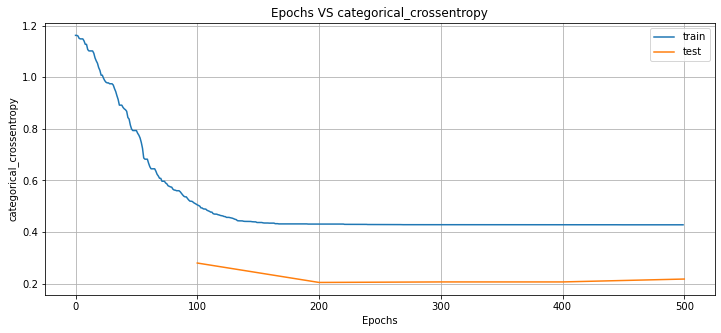

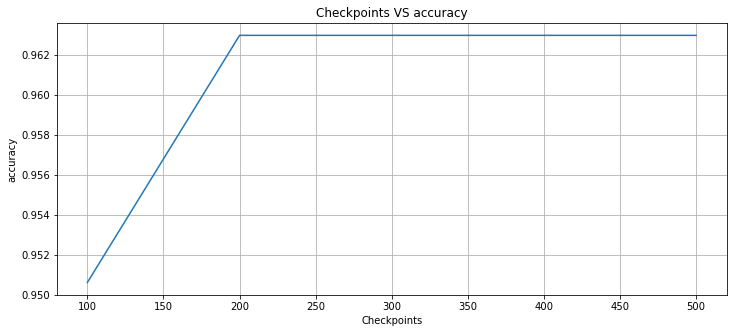

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9506172839506173, 'mean_square_error': 0.12674374315097003, 'categorical_crossentropy': 0.28000492519802517, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 7, 'tn_hit': 21, 'fn_hit': 1}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 5}, 2: {'tp_hit': 11, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 2}}, 'checkpoint': 100} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.08549629965225881, 'categorical_crossentropy': 0.20474871882685908, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 5, 'tn_hit': 23, 'fn_hit': 1}, 1: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 3}, 2: {'tp_hit': 11, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 2}}, 'checkpoint': 200} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.08665649154643523, 'categorical_crossentropy': 0.20673460430569118, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 5, 'tn_hit': 23, 'fn_hit': 1}, 1: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 3}, 2: {'tp_hit': 11, 'fp_hit': 1, 'tn_hit': 94,

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[-0.8297806   1.4923602   1.00135     0.25929323 -0.61532724]
 bias: -1.0357929468154907

Neuron 1: weights:
[ 0.47675404 -0.8004476  -0.21622773  0.70464504  0.89535207]
 bias: -0.7890270948410034

Neuron 2: weights:
[-0.23831454  1.0846289   0.2665118  -0.9486902  -1.3230871 ]
 bias: 1.1438772678375244

Neuron 3: weights:
[ 0.59999233 -1.1731262  -0.5918307  -0.13625142  0.34927115]
 bias: 0.8006475567817688

$
Layer 2
Neuron 0: weights:
[-1.4160593 -1.055865   1.6302161  1.2269509]
 bias: 0.2540114223957062

Neuron 1: weights:
[ 3.        -0.8146489  0.2645151 -1.6891363]
 bias: -0.2671099007129669

Neuron 2: weights:
[-0.7065804  1.7352387 -2.0911937  0.6713317]
 bias: 0.007327997125685215

$

